In [1]:
import pandas as pd
import codecs
import chardet
import numpy as np
import matplotlib.pyplot as plt


In [2]:
best_sellers = 'Resources/Bestsellers_Masks.csv'
best_sellers_df = pd.read_csv(best_sellers, encoding = 'utf-8')
best_sellers_df.head()

,#,Product Name,Brand,Price,Price 30,Min Price,Net,FBA Fees,Net Margin,LQS,...,Available From,Rating,Best Seller in,Best Seller Category URL,A+,Weight,Seller Type,Variants,ASIN,URL
0,1.0,Viva Naturals Premium Disposable Face Mask wit...,VivaNaturals,29.99,23.49,29.99,17.64,12.35,59.0,75.0,...,8/17/2020,4.4,in Cloth Face Masks,https://www.amazon.ca/gp/bestsellers/hpc/21259...,True,0.68,MCH,6.0,B08DQB9MS7,https://www.amazon.ca/dp/B08DQB9MS7
1,2.0,Weddingstar 3-Ply Adult Washable Cloth Face Ma...,WEDDINGSTAR,11.99,11.99,11.99,5.86,6.13,49.0,62.0,...,2/20/2021,4.1,NaN,NaN,True,0.02,MCH,38.0,B0888991JR,https://www.amazon.ca/dp/B0888991JR
2,3.0,"EnerPlex Face Mask Cloth Mask Reusable Masks, ...",EnerPlex,24.95,24.43,24.95,16.87,8.08,68.0,68.0,...,5/23/2020,4.4,masks reusable,https://www.amazon.ca/s/ref=choice_dp_b?keywor...,True,0.13,MCH,36.0,B088C2WD5F,https://www.amazon.ca/dp/B088C2WD5F
3,5.0,30 Pack Disposable Face Masdks - Ships From Ca...,WEAREKINGS,27.95,27.95,27.95,16.84,11.11,60.0,60.0,...,4/22/2021,4.0,n 95 masks made in canada black,https://www.amazon.ca/s/ref=choice_dp_b?keywor...,True,0.44,MCH,1.0,B0936NHV6K,https://www.amazon.ca/dp/B0936NHV6K
4,9.0,50Pcs Kids Face Mask Disposable 3 Ply Safety F...,BARMBOOW,12.99,14.33,12.99,4.62,8.37,36.0,68.0,...,5/18/2021,4.3,NaN,NaN,False,0.31,MCH,4.0,B0927VDRB5,https://www.amazon.ca/dp/B0927VDRB5


In [3]:
best_sellers_df.columns

Index(['#', 'Product Name', 'Brand', 'Price', 'Price 30', 'Min Price', 'Net',
       'FBA Fees', 'Net Margin', 'LQS', 'Category', 'Product Score',
       'productScoreReselling', 'Number of Sellers', 'Rank', 'BSR 30',
       'Inventory', 'Est Sales', 'Est Revenue', '# of Reviews', 'RPR',
       'Available From', 'Rating', 'Best Seller in ',
       'Best Seller Category URL', 'A+', 'Weight', 'Seller Type', 'Variants',
       'ASIN', 'URL'],
      dtype='object')

In [4]:
best_clean_df = best_sellers_df[['Brand', 'Price','Est Sales', 'Est Revenue']]
best_clean_df.head()

,Brand,Price,Est Sales,Est Revenue
0,VivaNaturals,29.99,6477.0,152144.70
1,WEDDINGSTAR,11.99,536.0,6426.64
2,EnerPlex,24.95,642.0,15304.79
3,WEAREKINGS,27.95,264.0,7378.80
4,BARMBOOW,12.99,22.0,315.99


In [5]:
Top_10_Brands_df = best_clean_df.head(10)
Top_10_Brands_df

,Brand,Price,Est Sales,Est Revenue
0,VivaNaturals,29.99,6477.0,152144.70
1,WEDDINGSTAR,11.99,536.0,6426.64
2,EnerPlex,24.95,642.0,15304.79
3,WEAREKINGS,27.95,264.0,7378.80
4,BARMBOOW,12.99,22.0,315.99
5,Canada Health Plus,17.99,196.0,3526.04
6,Vilesw,15.99,70.0,1216.55
7,Wrakus,13.89,39.0,541.71
8,FirstAidCentral,12.50,82.0,1070.58
9,Bossguard,15.99,69.0,1103.31


In [9]:
Top_10_Brands_df_2 = Top_10_Brands_df.sort_values('Est Sales')
Top_10_Brands_df_2.head(10)

,Brand,Price,Est Sales,Est Revenue
4,BARMBOOW,12.99,22.0,315.99
7,Wrakus,13.89,39.0,541.71
9,Bossguard,15.99,69.0,1103.31
6,Vilesw,15.99,70.0,1216.55
8,FirstAidCentral,12.50,82.0,1070.58
5,Canada Health Plus,17.99,196.0,3526.04
3,WEAREKINGS,27.95,264.0,7378.80
1,WEDDINGSTAR,11.99,536.0,6426.64
2,EnerPlex,24.95,642.0,15304.79
0,VivaNaturals,29.99,6477.0,152144.70


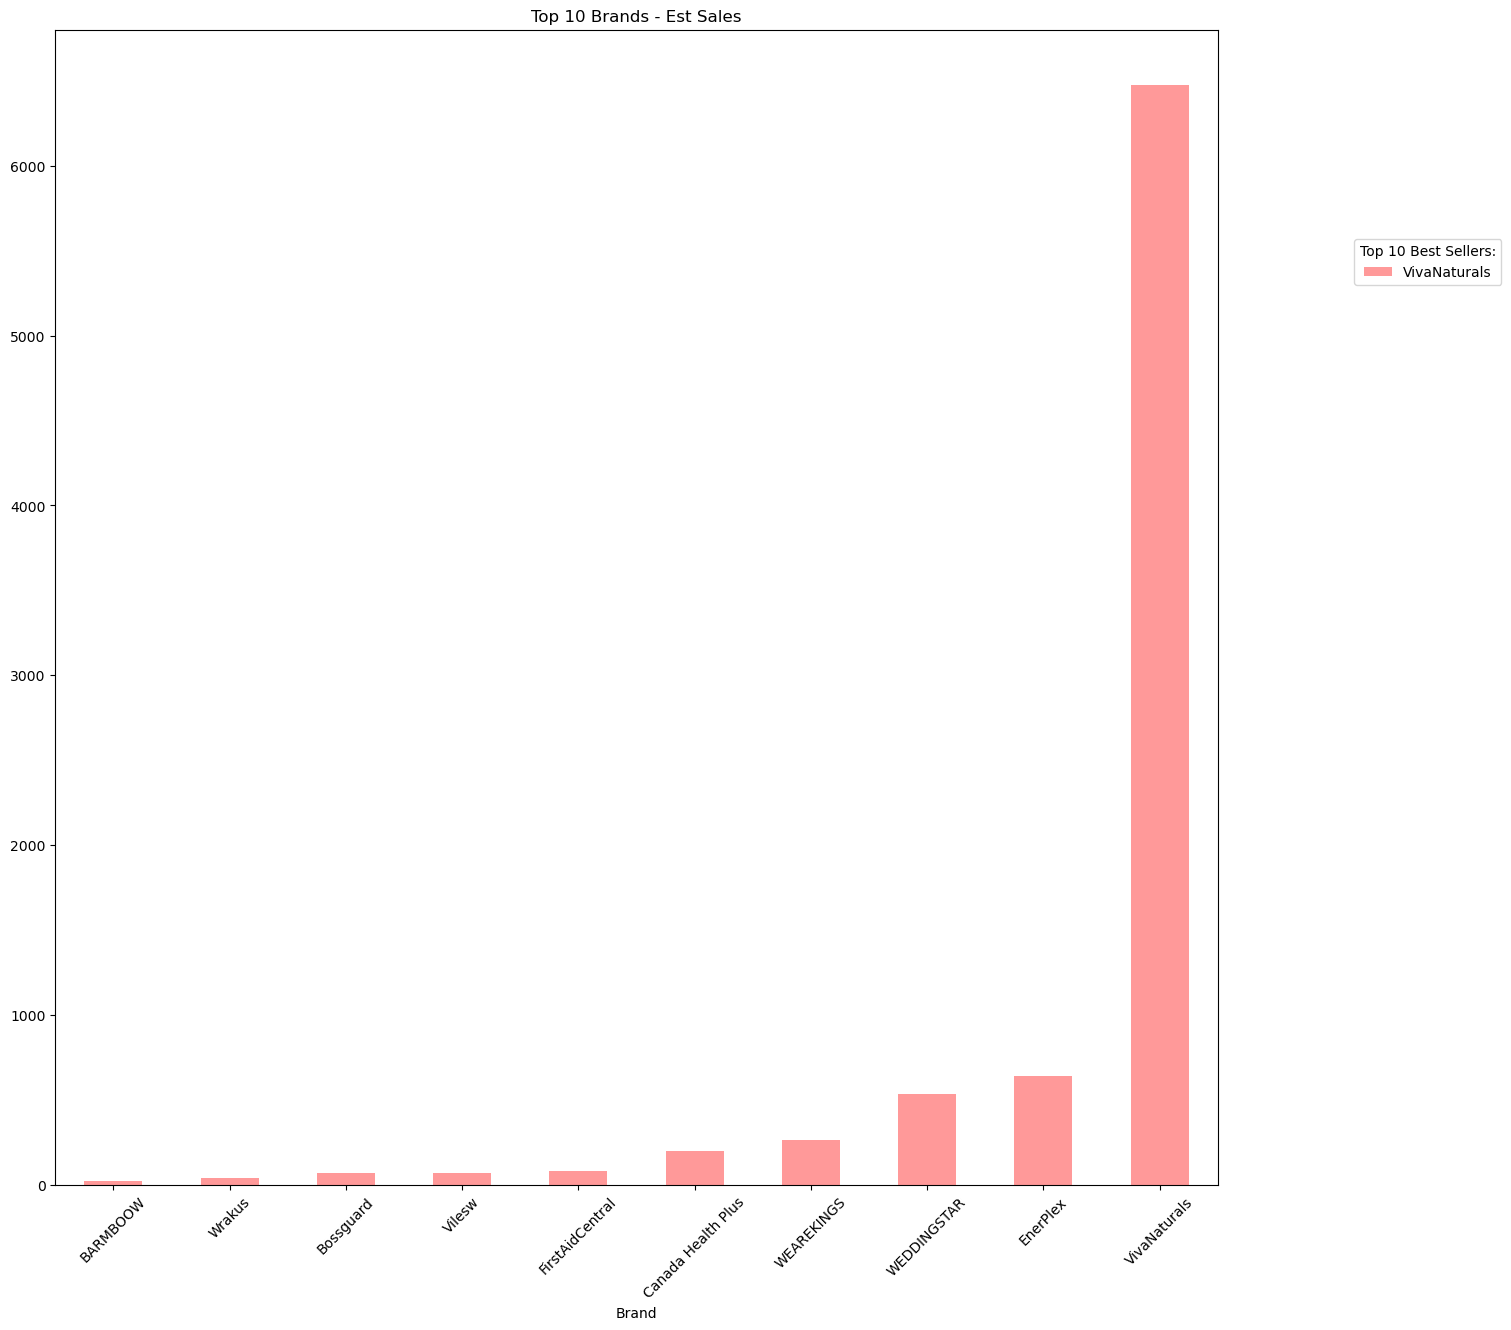

<Figure size 640x480 with 0 Axes>

In [10]:
top10_sales = Top_10_Brands_df_2[["Brand","Est Sales"]]
top10_sales = top10_sales.set_index("Brand")
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#cbf85f', '#448ee4']
# Use DataFrame.plot() in order to create a bar chart of the data
top10_sales.plot(kind="bar", figsize=(15,15), color=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#4F6272', 
                                                     '#B7C3F3', '#DD7596', '#8EB897', '#cbf85f', '#448ee4'])
# Set a title for the chart
plt.xticks(rotation=45)
labels = Top_10_Brands_df['Brand']
plt.legend(labels = labels, title = "Top 10 Best Sellers:", loc="best", bbox_to_anchor=(1, -.175, 0.25, 1))
plt.title("Top 10 Brands - Est Sales")
plt.savefig("figures/top10.png")
plt.show()
plt.tight_layout()